<br><br>
<h1 align="center"> 02 Initial EDS </h1>
<h4 align="center"> ( Basic Data Visualization ) </h4>
<br><br>

In [1]:
'''import thpe libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [2]:
'''load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)
cols = [0]
loan_data.drop(loan_data.columns[cols], axis=1, inplace=True)

In [3]:
'''How many rows and columns?'''
print(loan_data.shape)

(1340973, 38)


In [4]:
'''
A first look at the data, null values, data types, unique values etc.
Check which columns are having all null values. We need to drop those columns.
Also, check the columns having one or more null values. We need to take care of them.
'''
cols = loan_data.columns
null_count = 0
null_pct = 'None'
d = []
d_types = loan_data.dtypes

for ind, col in enumerate(cols):
    if loan_data[col].isnull().all():
        null_count = 'all'
        null_pct = '100%'
    else:
        null_count = loan_data[col].isnull().sum()
        total_records = len(loan_data)
        if null_count > 0:
            null_pct = 'Missing Values'
        else:
            null_pct = 'None'
    

    d.append({'col': col, 'null_count': null_count, 'null_pct': null_pct, 'd_type': d_types[col], 
              'n_unique': loan_data[col].nunique()})
    null_count = 0
    null_pct = 'None'
    
    
loan_data_info = pd.DataFrame(d)

# Write the loan_data_info to CSV file
# loan_data_info.to_csv('loan_features.csv', sep=',', encoding='UTF-8')

# Write the loan_data_info to .xlsx file
#loan_data_info.to_csv('loan_features.xlsx')

# Display the dataframe as HTML table
display(HTML(loan_data_info.to_html()))

,col,null_count,null_pct,d_type,n_unique
0,loan_amnt,0,None,int64,1562
1,term,0,None,object,2
2,int_rate,0,None,float64,672
3,installment,0,None,float64,83593
4,grade,0,None,object,7
5,sub_grade,0,None,object,35
6,emp_length,0,None,object,11
7,home_ownership,0,None,object,6
8,annual_inc,0,None,float64,64248
9,verification_status,0,None,object,3


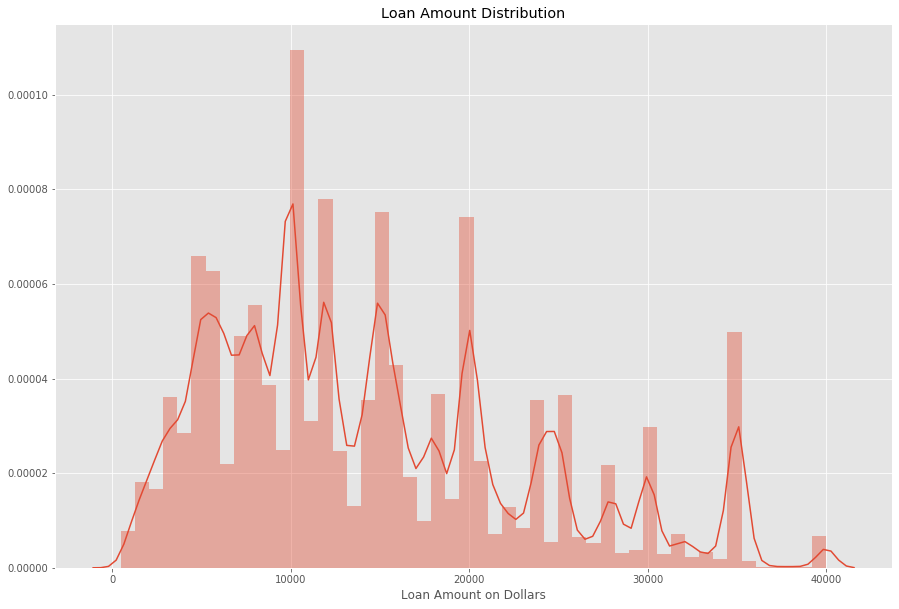

In [5]:
'''Loan Amount Distribution'''
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

sns.distplot(loan_data['loan_amnt'])

plt.xlabel("Loan Amount on Dollars")
plt.title("Loan Amount Distribution")

plt.show()

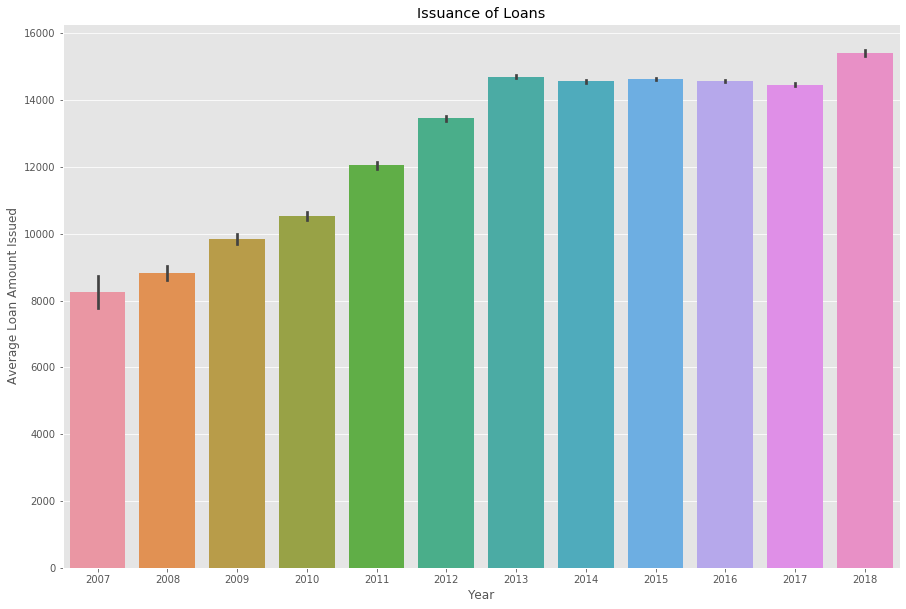

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

loan_data['issue_d'] = loan_data['issue_d'].astype('datetime64[ns]')
sns.barplot(loan_data['issue_d'].dt.year, 'loan_amnt', data=loan_data)

plt.title('Issuance of Loans')
plt.xlabel('Year')
plt.ylabel('Average Loan Amount Issued')

plt.show()